# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the OpenWeatherMap API key and base URL
api_key = "4b8adf8c56092b6975794af5abbf129d"  
base_url = "http://api.openweathermap.org/data/2.5/weather"

# Define lists to store weather data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through all the cities in the list to fetch weather data
for i, city in enumerate(cities):
    # Create endpoint URL with each city
    params = {
        "q": city,
        "appid": api_key,
        "units": "metric"  # You can adjust units as needed (metric for Celsius)
    }

    # Run an API request for each city
    try:
        # Make the API request
        response = requests.get(base_url, params=params)
        data = response.json()

        # Check if the API returned a valid response
        if data.get("cod") == 200:
            # Parse out the required weather data
            city_name = data["name"]
            city_lat = data["coord"]["lat"]
            city_lon = data["coord"]["lon"]
            city_temp = data["main"]["temp"]
            city_humidity = data["main"]["humidity"]
            city_cloudiness = data["clouds"]["all"]
            city_wind_speed = data["wind"]["speed"]
            city_country = data["sys"]["country"]
            city_date = datetime.utcfromtimestamp(data["dt"]).strftime('%Y-%m-%d %H:%M:%S')

            # Append the data to the list
            city_data.append({
                "City": city_name,
                "Lat": city_lat,
                "Lon": city_lon,
                "Temp": city_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_cloudiness,
                "Wind Speed": city_wind_speed,
                "Country": city_country,
                "Date": city_date
            })

            # Log the data retrieval
            print(f"Processing Record {i + 1} | {city_name}")

        else:
            print(f"City not found: {city}. Skipping...")

    except Exception as e:
        print(f"Error processing {city}: {str(e)}. Skipping...")

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Donaghadee
Processing Record 2 | Howrah
City not found: puerto san carlos. Skipping...
Processing Record 4 | Cannonvale
Processing Record 5 | Ilulissat
Processing Record 6 | Blackmans Bay
Processing Record 7 | Margaret River
Processing Record 8 | Grand Falls-Windsor
Processing Record 9 | Waitangi
Processing Record 10 | Constanța
Processing Record 11 | Knoxville
City not found: vingt cinq. Skipping...
Processing Record 13 | Fada N'gourma
Processing Record 14 | Puerto Natales
Processing Record 15 | Whitehorse
Processing Record 16 | Stanley
Processing Record 17 | St. John's
Processing Record 18 | Adamstown
Processing Record 19 | Hadibu
Processing Record 20 | Udachny
Processing Record 21 | Tromsø
Processing Record 22 | Hermanus
Processing Record 23 | Quellón
Processing Record 24 | Kapuskasing
Processing Record 25 | Basi
Processing Record 26 | Banchory
Processing Record 27 | Yeniseysk
Processing Record 28 | Wailua 

Processing Record 240 | San Antonio Oeste
Processing Record 241 | Taoudenni
Processing Record 242 | Lihue
Processing Record 243 | Ta`ū
Processing Record 244 | Kadnikov
Processing Record 245 | Longyearbyen
Processing Record 246 | Nyurba
Processing Record 247 | Kavaratti
Processing Record 248 | Novyy Urgal
Processing Record 249 | Vorkuta
Processing Record 250 | El Granada
Processing Record 251 | São José da Coroa Grande
Processing Record 252 | Humaitá
Processing Record 253 | Weno
Processing Record 254 | Arafat
Processing Record 255 | Ensenada
Processing Record 256 | Arrondissement de Morlaix
Processing Record 257 | Settat
Processing Record 258 | Prachuap Khiri Khan
Processing Record 259 | Buritizeiro
Processing Record 260 | Flying Fish Cove
Processing Record 261 | Amaliáda
Processing Record 262 | Tazovsky
Processing Record 263 | Iaciara
Processing Record 264 | Petropavlovsk-Kamchatskiy
Processing Record 265 | Sretensk
Processing Record 266 | Mar del Plata
Processing Record 267 | Alice Sp

Processing Record 481 | Khandyga
Processing Record 482 | Nieuw Amsterdam
Processing Record 483 | Nouadhibou
Processing Record 484 | Chivilcoy
City not found: kataragama. Skipping...
Processing Record 486 | Fortuna
Processing Record 487 | White River
Processing Record 488 | Ozark
Processing Record 489 | Newman
Processing Record 490 | Gouré
Processing Record 491 | Andergrove
Processing Record 492 | Nayoro
Processing Record 493 | Saacow
Processing Record 494 | Totness
Processing Record 495 | Calama
Processing Record 496 | Atasū
Processing Record 497 | Rémire-Montjoly
Processing Record 498 | Bengkulu
Processing Record 499 | Brak
Processing Record 500 | Daru
Processing Record 501 | Rumonge
Processing Record 502 | Salacgrīva
Processing Record 503 | Muravlenko
Processing Record 504 | Achalpur
Processing Record 505 | Horta
Processing Record 506 | Acaraú
Processing Record 507 | Bassar
Processing Record 508 | Salahonda
Processing Record 509 | Bolkhov
Processing Record 510 | Shakargarh
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lon           576
Temp          576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Donaghadee,54.6333,-5.5333,11.89,86,80,0.89,GB,2023-10-03 23:08:45
1,Howrah,22.5892,88.3103,26.00,94,100,4.12,IN,2023-10-03 23:08:46
2,Cannonvale,-20.2833,148.7000,24.66,73,27,2.23,AU,2023-10-03 23:08:46
3,Ilulissat,69.2167,-51.1000,-1.99,59,17,0.00,GL,2023-10-03 23:08:46
4,Blackmans Bay,-43.0167,147.3167,11.49,69,100,2.38,AU,2023-10-03 23:08:46


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Donaghadee,54.6333,-5.5333,11.89,86,80,0.89,GB,2023-10-03 23:08:45
1,Howrah,22.5892,88.3103,26.00,94,100,4.12,IN,2023-10-03 23:08:46
2,Cannonvale,-20.2833,148.7000,24.66,73,27,2.23,AU,2023-10-03 23:08:46
3,Ilulissat,69.2167,-51.1000,-1.99,59,17,0.00,GL,2023-10-03 23:08:46
4,Blackmans Bay,-43.0167,147.3167,11.49,69,100,2.38,AU,2023-10-03 23:08:46


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

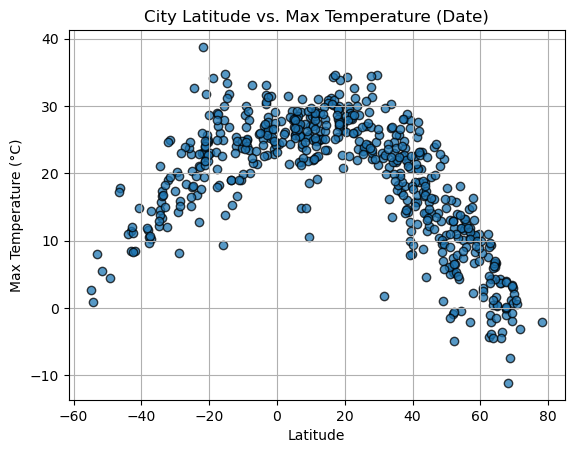

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Temp'], edgecolor='black', alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Max Temperature (Date)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

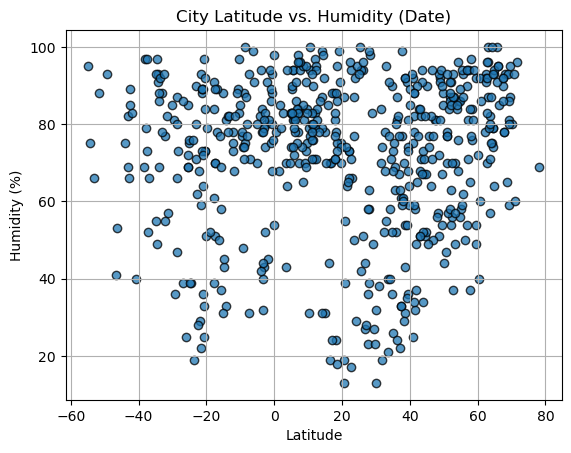

In [9]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (Date)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

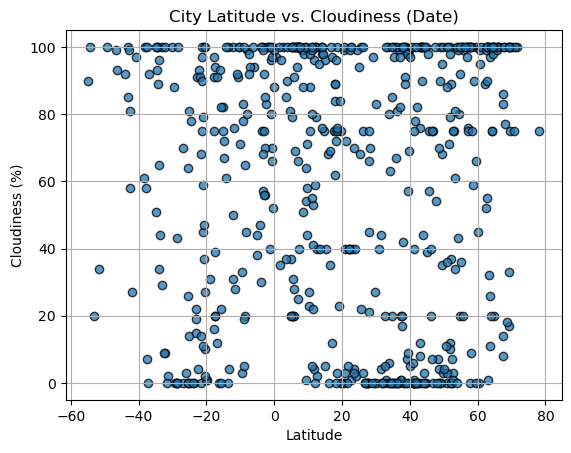

In [10]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (Date)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

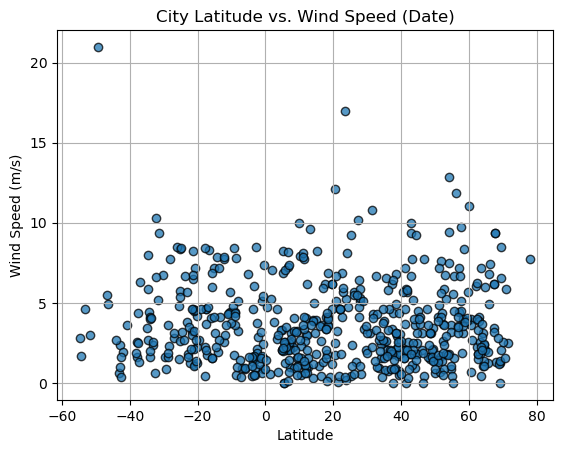

In [11]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (Date)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line's y-values
    regress_values = x_values * slope + intercept

    # Create the linear regression equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create the scatter plot
    plt.scatter(x_values, y_values, edgecolor='black', alpha=0.75)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    
    # Annotate the line equation on the plot
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Display the r-squared value
    plt.annotate(f"R-squared = {round(rvalue**2, 2)}", (min(x_values), max(y_values) - 10), fontsize=12, color="red")

    # Show legend
    plt.legend()
    
    # Save the figure
    plt.savefig(filename)

    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Donaghadee,54.6333,-5.5333,11.89,86,80,0.89,GB,2023-10-03 23:08:45
1,Howrah,22.5892,88.3103,26.00,94,100,4.12,IN,2023-10-03 23:08:46
3,Ilulissat,69.2167,-51.1000,-1.99,59,17,0.00,GL,2023-10-03 23:08:46
6,Grand Falls-Windsor,48.9332,-55.6649,6.95,92,100,3.13,CA,2023-10-03 23:08:46
8,Constanța,44.1833,28.6500,11.38,67,3,3.61,RO,2023-10-03 23:08:11


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Cannonvale,-20.2833,148.7000,24.66,73,27,2.23,AU,2023-10-03 23:08:46
4,Blackmans Bay,-43.0167,147.3167,11.49,69,100,2.38,AU,2023-10-03 23:08:46
5,Margaret River,-33.9500,115.0667,13.42,69,96,1.61,AU,2023-10-03 23:06:52
7,Waitangi,-43.9535,-176.5597,11.01,75,92,2.68,NZ,2023-10-03 23:08:46
11,Puerto Natales,-51.7236,-72.4875,5.48,88,34,3.01,CL,2023-10-03 23:08:47


###  Temperature vs. Latitude Linear Regression Plot

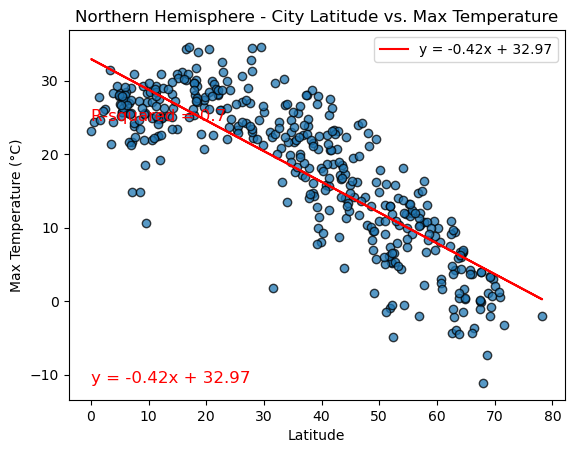

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Temp'],
    'Latitude',
    'Max Temperature (°C)',
    'Northern Hemisphere - City Latitude vs. Max Temperature',
    'northern_hemi_df'
)


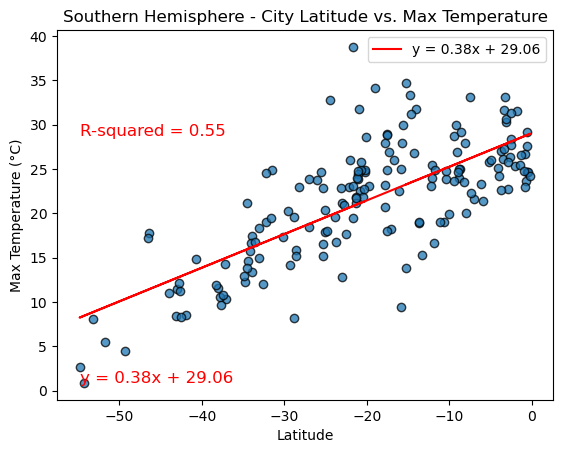

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Temp'],
    'Latitude',
    'Max Temperature (°C)',
    'Southern Hemisphere - City Latitude vs. Max Temperature',
    'southern_hemi_df'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

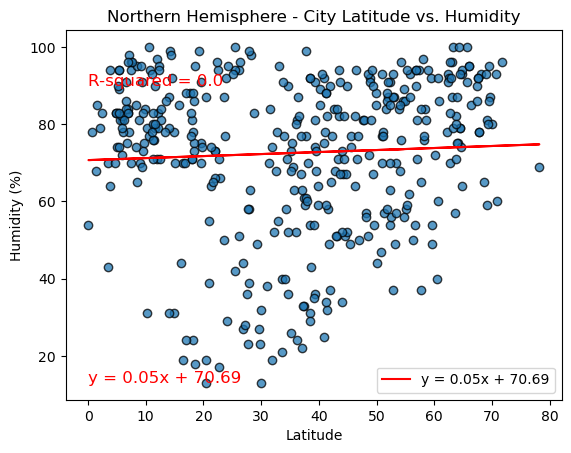

In [17]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    'Latitude',
    'Humidity (%)',
    'Northern Hemisphere - City Latitude vs. Humidity',
    'northern_hemi_df')

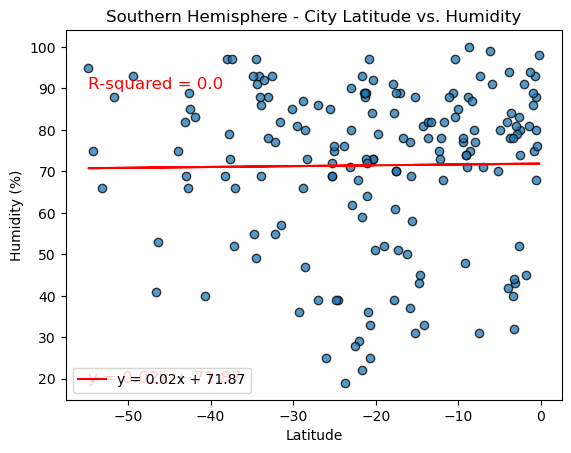

In [18]:
#Southern
plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    'Latitude',
    'Humidity (%)',
    'Southern Hemisphere - City Latitude vs. Humidity',
    'southern_hemi_df')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

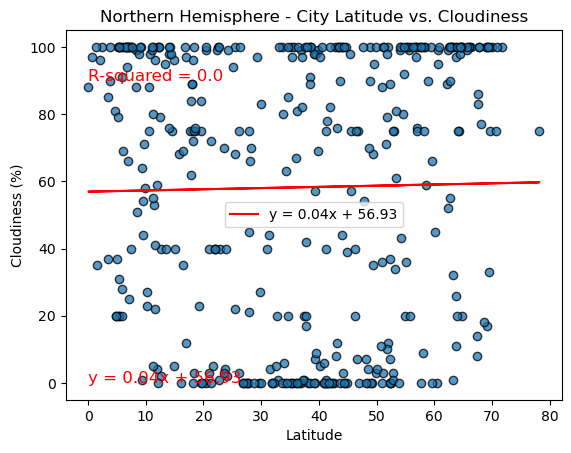

In [19]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    'Latitude',
    'Cloudiness (%)',
    'Northern Hemisphere - City Latitude vs. Cloudiness',
    'northern_hemi_df'
)

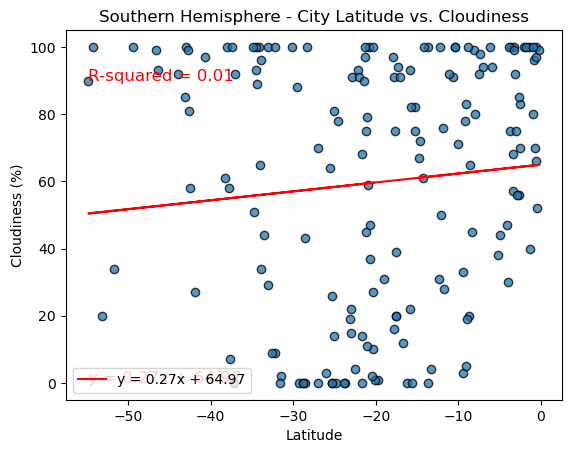

In [20]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    'Latitude',
    'Cloudiness (%)',
    'Southern Hemisphere - City Latitude vs. Cloudiness',
    'southern_hemi_df'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

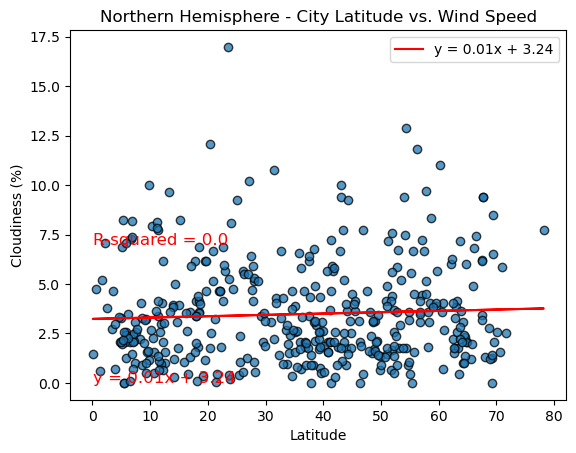

In [21]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    'Latitude',
    'Cloudiness (%)',
    'Northern Hemisphere - City Latitude vs. Wind Speed',
    'northern_hemi_df'
)

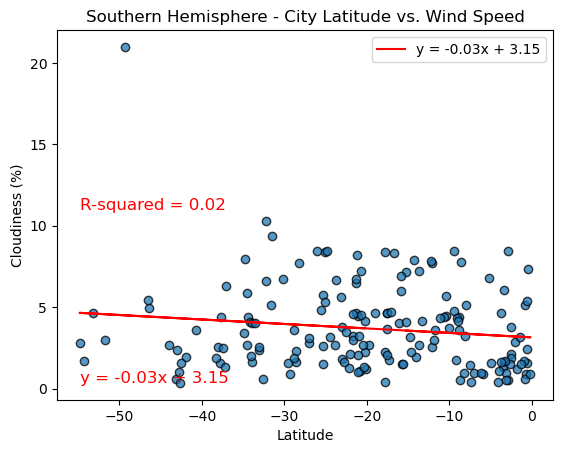

In [22]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    'Latitude',
    'Cloudiness (%)',
    'Southern Hemisphere - City Latitude vs. Wind Speed',
    'southern_hemi_df'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE